# Homework 5 - Supervised and Unsupervised Learnign on Real World Datasets

### Part 1 - MNIST


##### Step 1: Load and Visualize the Data

In [1]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale, LabelEncoder
import matplotlib.pyplot as plt

mnist = load_digits()
X = scale(mnist.data)
plt.imshow(X[0].reshape(8, 8), cmap=plt.cm.gray)

ModuleNotFoundError: No module named 'sklearn'

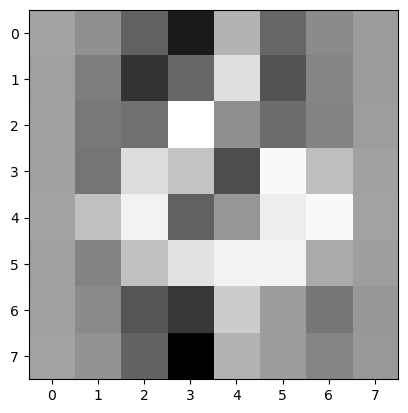

In [109]:
plt.imshow(X[100].reshape(8, 8), cmap=plt.cm.gray)

##### Step 2: Train-Test Split

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

LABELS = [str(i) for i in mnist["target_names"]]
def evaluate_model(y_true, y_pred):
    print(classification_report(y_true, y_pred, target_names=LABELS), '\n')
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap='Blues', display_labels=LABELS)

X_train, X_test, y_train, y_test = train_test_split(X, mnist.target, test_size=0.2, stratify=mnist.target, random_state=42)

##### Step 3: Support Vector Machine (SVM)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      0.97      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.95      0.97      0.96        36
           5       0.97      1.00      0.99        37
           6       0.97      1.00      0.99        36
           7       0.95      0.97      0.96        36
           8       1.00      0.94      0.97        35
           9       1.00      0.94      0.97        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360
 



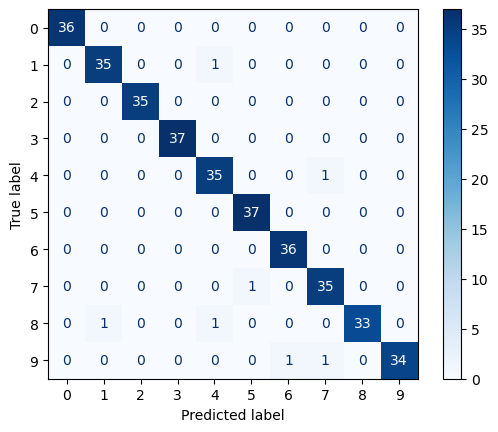

In [111]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=100)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
evaluate_model(y_test, y_pred)

The accuracy was really high and there was not one digit that was misclassified the most. Rather, there was one occurrence of each misclassification, but 4 and 7 where the most commonly predicted incorrect classes and 8 and 9 were the most commonly misclassified.

In [112]:
def plot_misclassified(y_test_set, y_pred_set):
    misclassified = [idx for idx, v in enumerate(y_test_set) if v != y_pred_set[idx]]
    fig, ax = plt.subplots(figsize=(10, 5), ncols=len(misclassified))
    for i, img_idx in enumerate(misclassified):
        ax[i].imshow(X_test[img_idx].reshape(8, 8), cmap=plt.cm.gray)

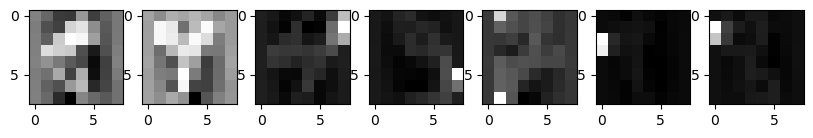

In [113]:
plot_misclassified(y_test, y_pred)

In [114]:
from sklearn.model_selection import cross_val_score
from typing import Any, List, Dict
from sklearn.base import BaseEstimator

def evaluate_with_cross_validation(X_train, y_train, model_class: BaseEstimator, param_name: str, param_vals: List[Any]) -> Dict[Any, float]:
    """
    Get the average cross validation score across an individual set of parameter values.

    :param X_train: training matirx
    :param y_train: targets
    :param model_class: class of estimator to use
    :param param_name: parameter name to adjust for each cross-validation score
    :param param_vals: values of the parameter to test for each cross-validation score
    :return: dictionary in format {param_val: average cross validation score}
    """
    print(f"Computing cross validation scores for {model_class.__name__} with {param_name} values of {param_vals}")
    averages = {}
    for param_val in param_vals:
        model = model_class(**{param_name: param_val})
        averages[param_val] = float(cross_val_score(model, X_train, y_train).mean())

    print("\tComputed scores:")
    for val, score in sorted(averages.items(), key=lambda x: x[1]): # Sort by values
        print(f"\t\t{val}: {score}")
    return averages

In [115]:
# Compute cross val scores across C for SVM
C_values = list(range(0, 500))[0::50]
C_values[0] = 1

_ = evaluate_with_cross_validation(X_train, y_train, SVC, 'C', C_values)

Computing cross validation scores for SVC with C values of [1, 50, 100, 150, 200, 250, 300, 350, 400, 450]
	Computed scores:
		1: 0.9832970383275261
		50: 0.9832970383275261
		100: 0.9832970383275261
		150: 0.9832970383275261
		200: 0.9832970383275261
		250: 0.9832970383275261
		300: 0.9832970383275261
		350: 0.9832970383275261
		400: 0.9832970383275261
		450: 0.9832970383275261


In the case of SVM, it appears varying the values of `C` did not change and the average cross validation score for each `C` was equivalent.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       1.00      0.97      0.99        35
           9       1.00      0.97      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360
 



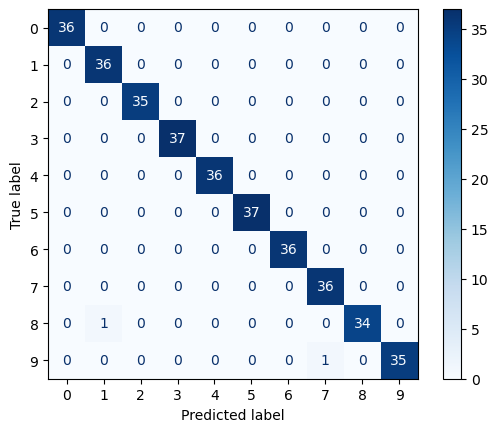

In [116]:
# Testing accuracy with non-scaled data

X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(mnist.data, mnist.target, test_size=0.2, stratify=mnist.target, random_state=42)

svm_model = SVC(kernel='rbf', C=100)
svm_model.fit(X_train_unscaled, y_train_unscaled)

y_pred_unscaled = svm_model.predict(X_test_unscaled)
evaluate_model(y_test_unscaled, y_pred_unscaled)

Surprisingly, the unscaled data resulted in a model which outperformed the scaled data.

Step 4: K-Nearest Neighbors (KNN)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.90      1.00      0.95        36
           2       0.95      1.00      0.97        35
           3       1.00      0.97      0.99        37
           4       0.97      0.94      0.96        36
           5       0.97      0.97      0.97        37
           6       0.97      0.97      0.97        36
           7       0.92      0.97      0.95        36
           8       0.97      0.86      0.91        35
           9       0.97      0.92      0.94        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360
 



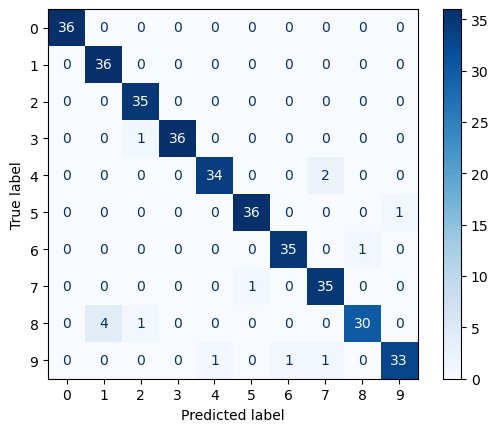

In [117]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
evaluate_model(y_test, y_pred)

The KNN classifier with `k=10` has an accuracy of 96%. The most common mistake is predicting `8` as `1`.

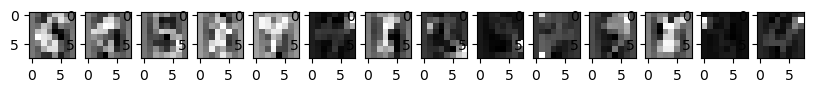

In [118]:
plot_misclassified(y_test, y_pred)

In [121]:
k_values = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45]
_ = evaluate_with_cross_validation(X_train, y_train, KNeighborsClassifier, 'n_neighbors', k_values)

Computing cross validation scores for KNeighborsClassifier with n_neighbors values of [1, 5, 10, 15, 20, 25, 30, 35, 40, 45]
	Computed scores:
		45: 0.9269115369725126
		40: 0.9296941540843979
		35: 0.9303837591947348
		30: 0.9394284746418894
		25: 0.9429152148664344
		20: 0.951969608981804
		15: 0.959623015873016
		10: 0.9644889663182346
		5: 0.9756266937669377
		1: 0.9756339527680989


The cross_validation_score evaluation shows the highest accuracy with `k=1` and `k=5`. With `k=1` just barely beating `k=5`.

### Part 2: Unsupervised Clustering on Human Activity Recognition Data

In [157]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

X_train = pd.read_csv("data/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
y_train = pd.read_csv("data/UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None).squeeze()

X_scaled = StandardScaler().fit_transform(X_train)

/var/folders/rt/ys_nh51j57g_4380wqr61ykr0000gn/T/ipykernel_73366/3304752186.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv("data/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
/var/folders/rt/ys_nh51j57g_4380wqr61ykr0000gn/T/ipykernel_73366/3304752186.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv("data/UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None).squeeze()


##### Step 2: Dimensionality Reduction

In [158]:
# Dimensionality reduction with PCA
from sklearn.decomposition import PCA

pca_2_comp = PCA(n_components=2)
X_2_comp = pca_2_comp.fit_transform(X_scaled)
pca_50_comp = PCA(n_components=50)
X_50_comp = pca_50_comp.fit_transform(X_scaled)

In [180]:
label_map = pd.read_csv("data/UCI HAR Dataset/activity_labels.txt", delim_whitespace=True, header=None, index_col=None).set_index(0).to_dict().get(1)

/var/folders/rt/ys_nh51j57g_4380wqr61ykr0000gn/T/ipykernel_73366/1609252856.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  label_map = pd.read_csv("data/UCI HAR Dataset/activity_labels.txt", delim_whitespace=True, header=None, index_col=None).set_index(0).to_dict().get(1)


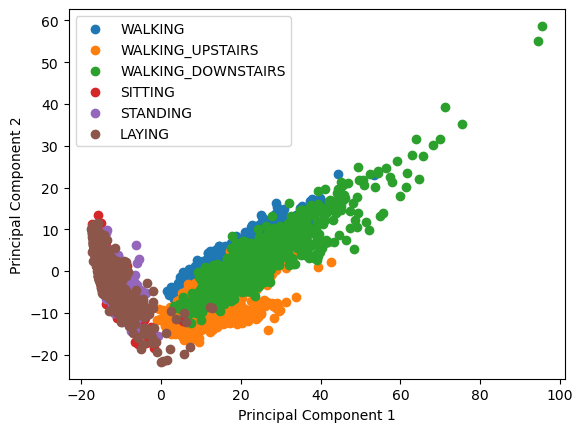

In [181]:
for val, name in label_map.items():
    mask = y_train == val
    plt.scatter(X_2_comp[mask, 0], X_2_comp[mask, 1], label=name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

##### Step 3: K-Means Clustering

In [189]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans_6 = KMeans(n_clusters=6).fit(X_50_comp)
y_pred = kmeans_6.predict(X_50_comp)

Intra-cluster distance: 1305385.7344773188
Silhouette Score: 0.15072630580522445


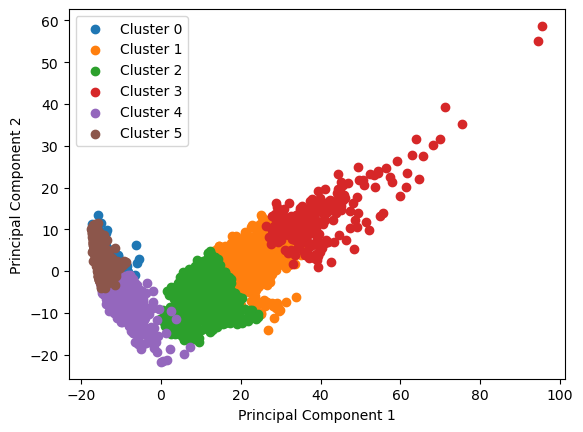

In [192]:
for cluster_num in set(y_pred):
    mask = y_pred == cluster_num
    plt.scatter(X_2_comp[mask, 0], X_2_comp[mask, 1], label=f"Cluster {cluster_num}")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
print(f"Intra-cluster distance: {-kmeans_6.score(X_50_comp)}")
print(f"Silhouette Score: {silhouette_score(X_50_comp, y_pred)}")

Text(0.5, 1.0, 'Elbow plot for 50 principal components')

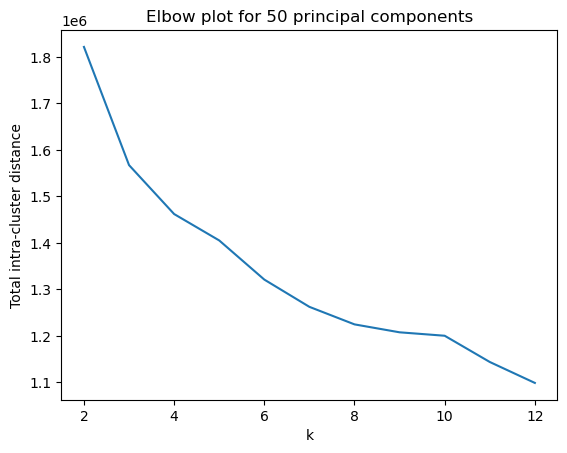

In [196]:
ks = range(2, 13)
scores = []

for k in ks:
    model = KMeans(n_clusters=k)
    y_pred = model.fit_predict(X_50_comp)
    scores.append(-model.score(X_50_comp))

plt.plot(ks, scores)
plt.ylabel("Total intra-cluster distance")
plt.xlabel("k")
plt.title("Elbow plot for 50 principal components")

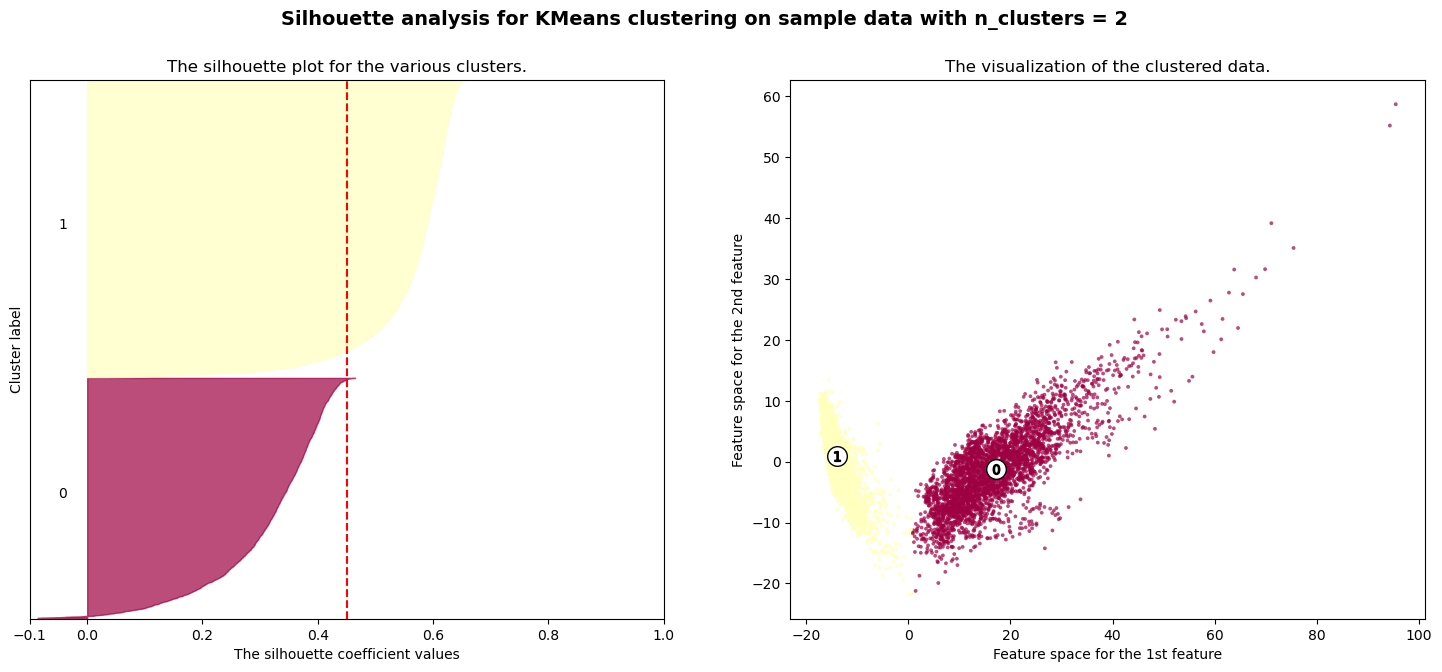

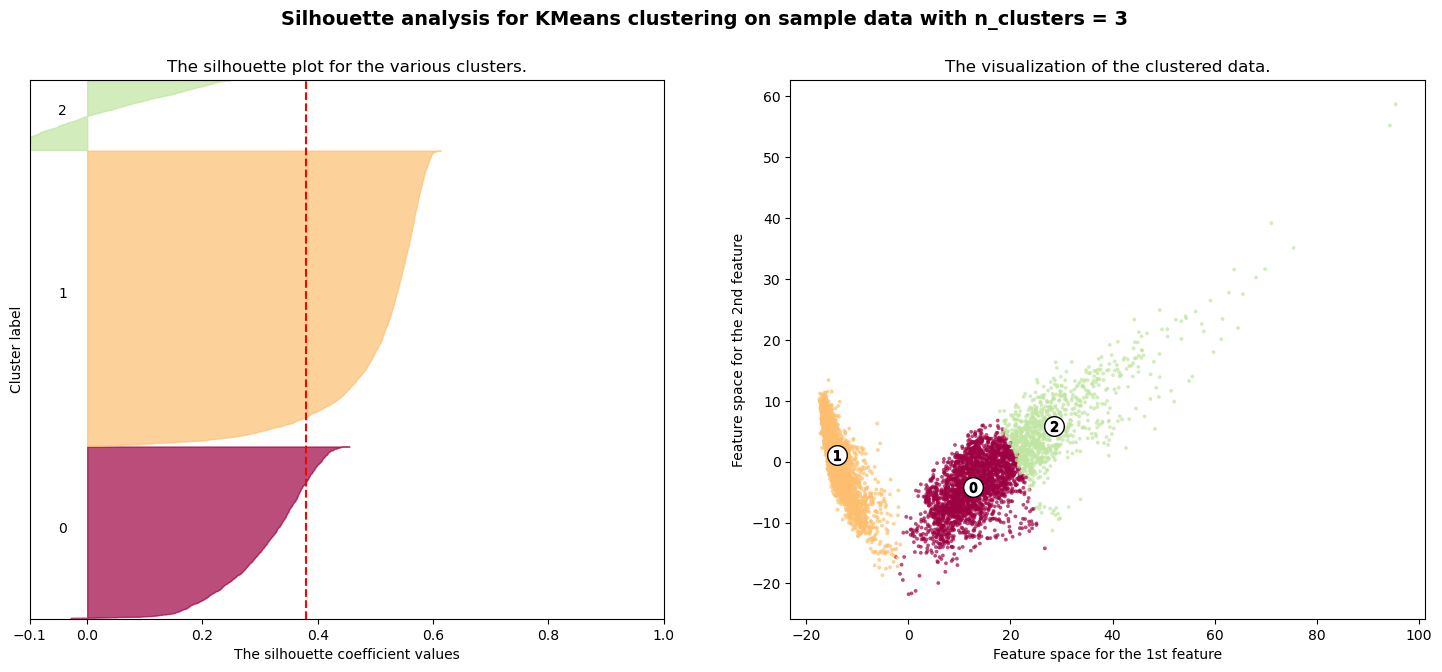

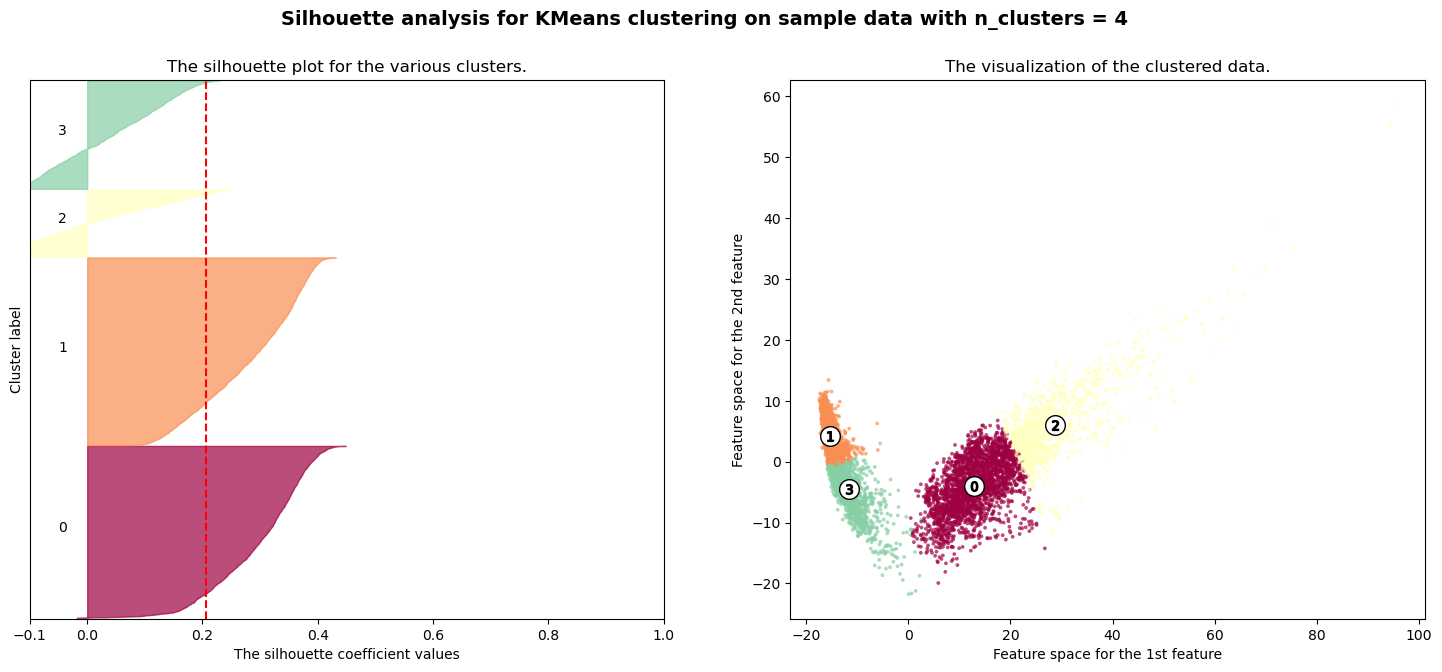

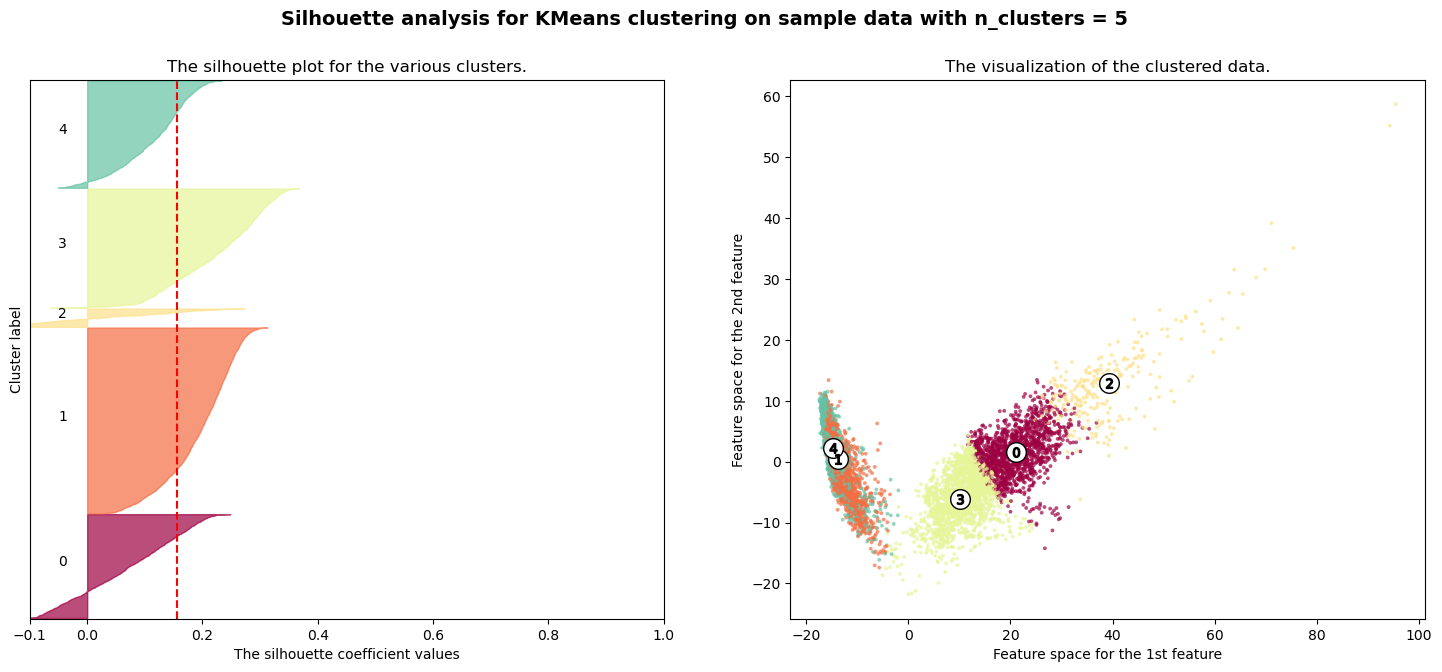

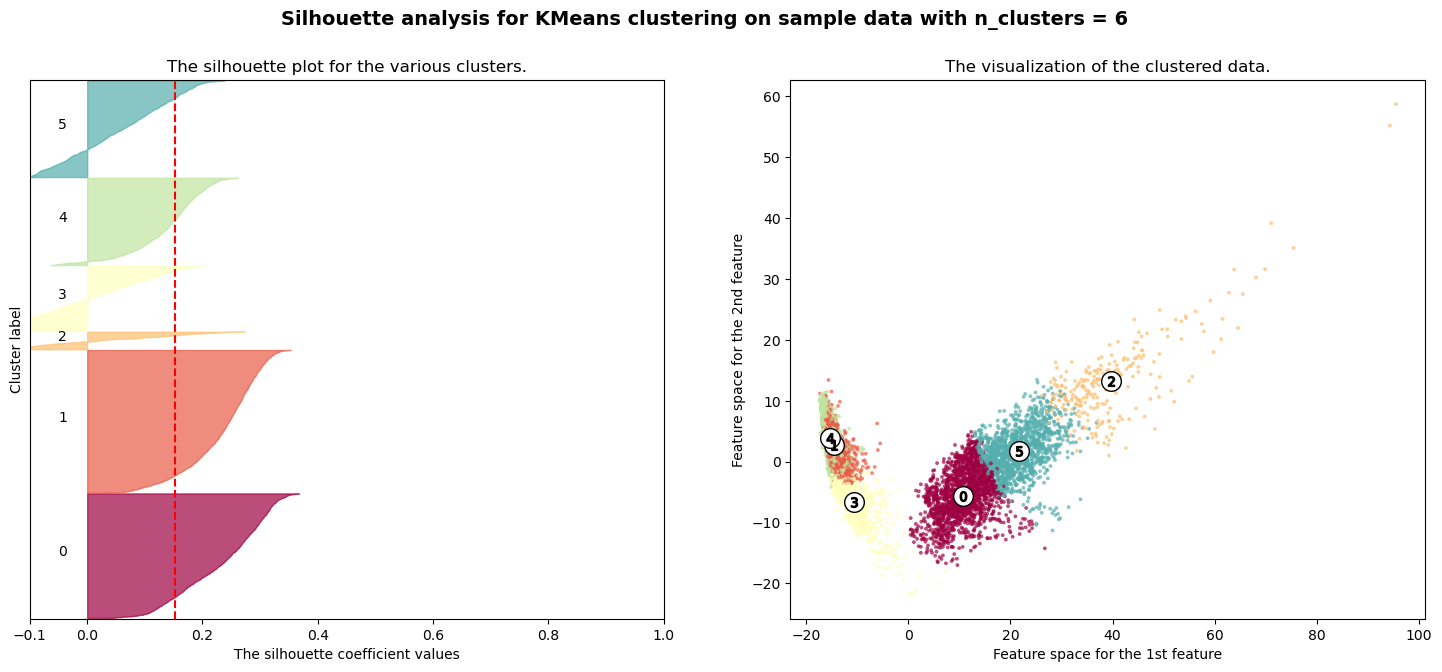

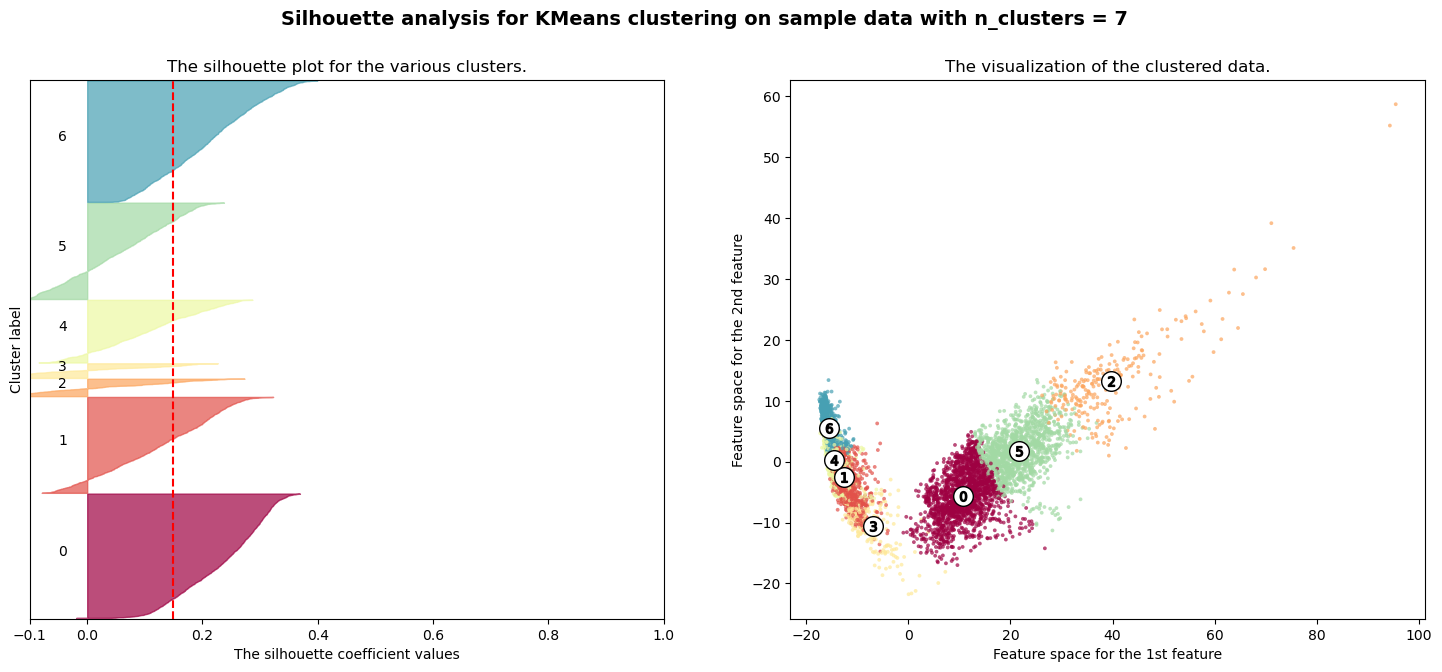

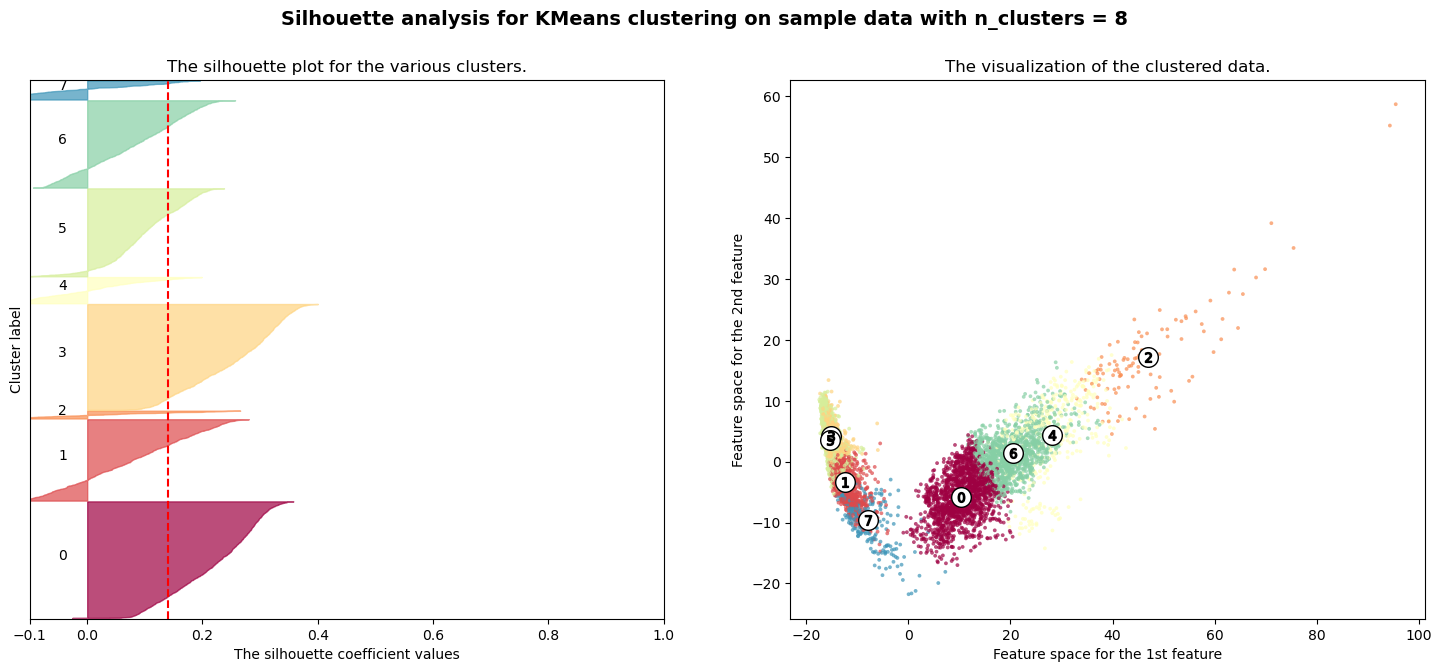

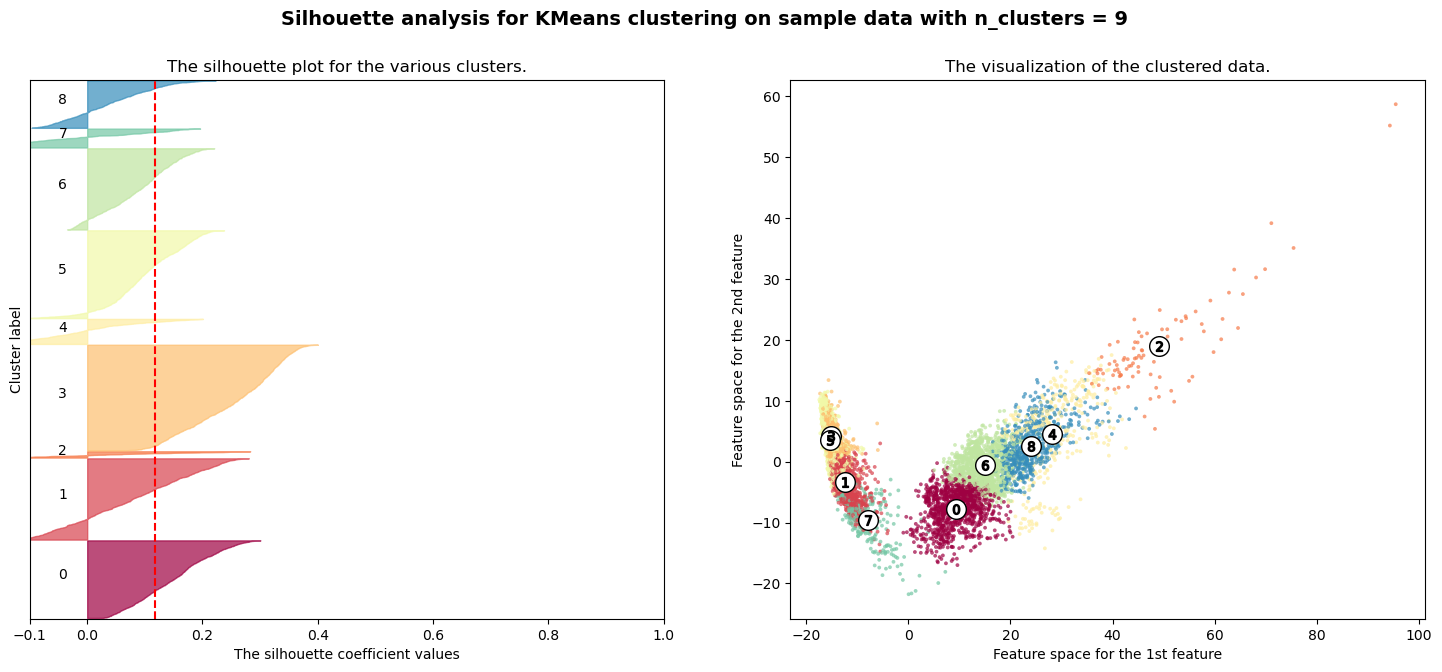

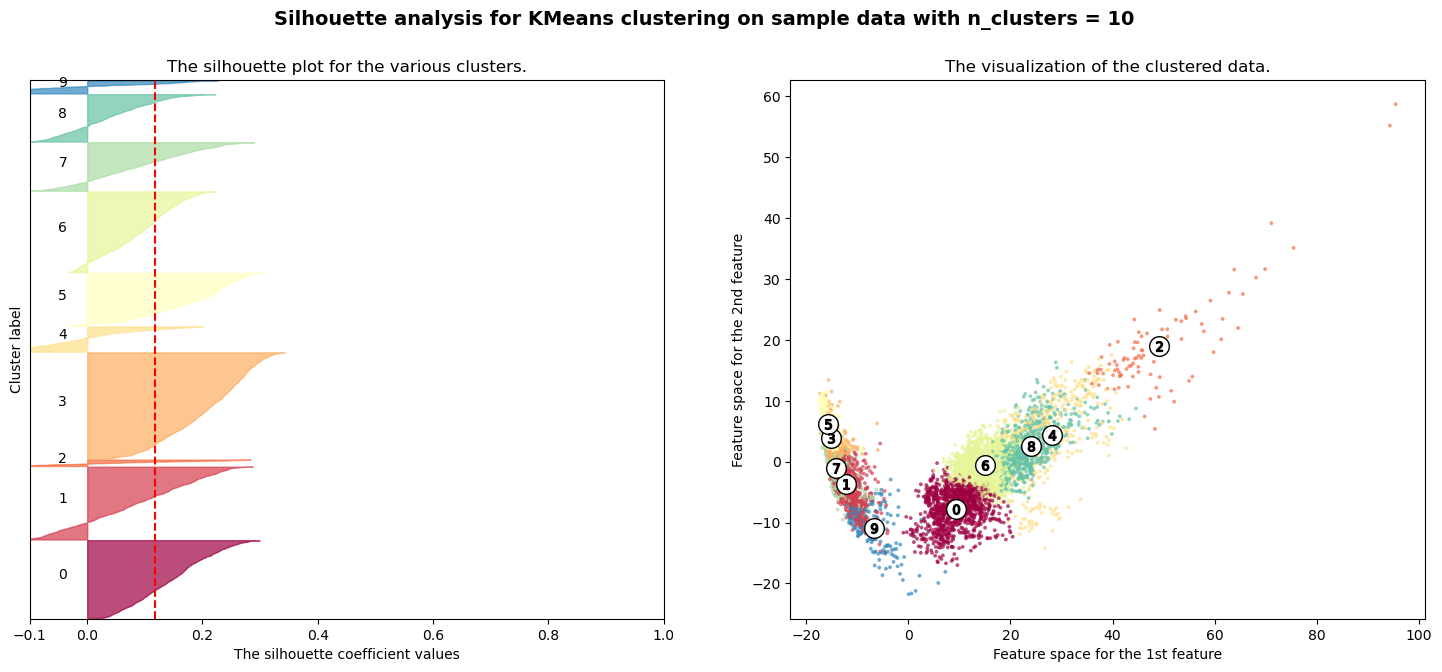

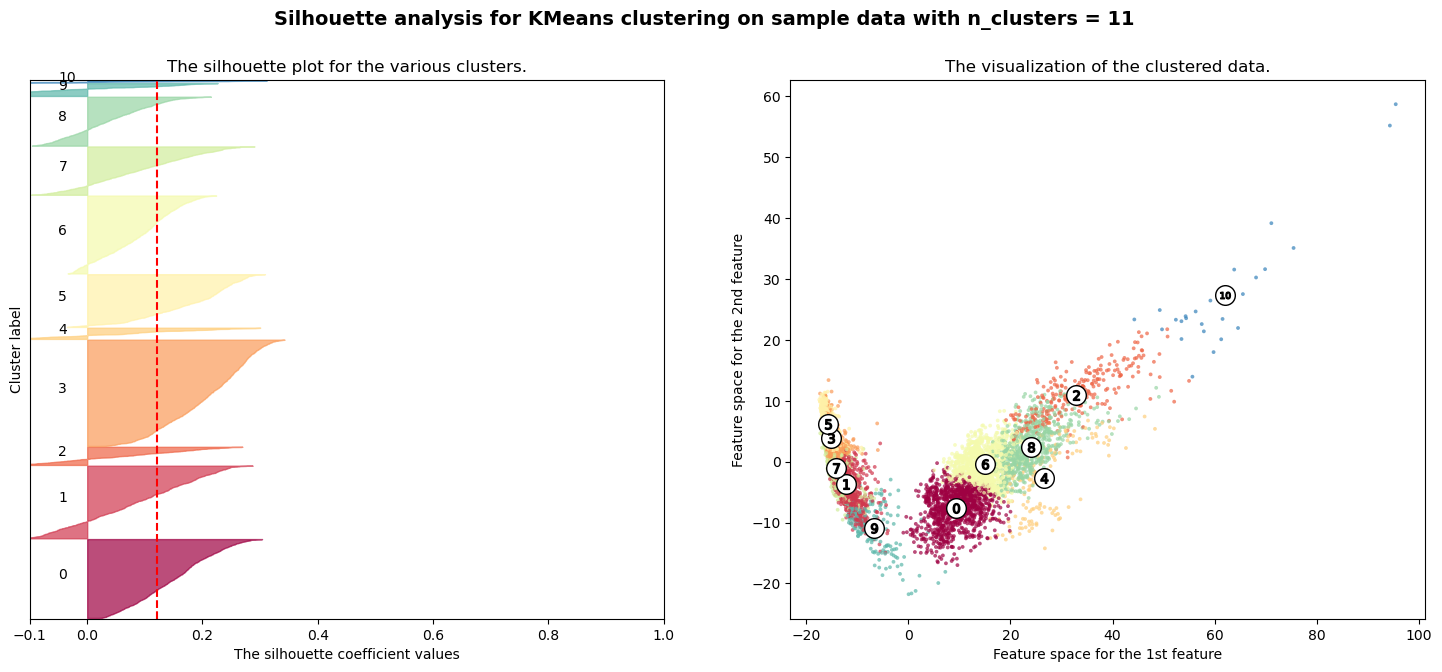

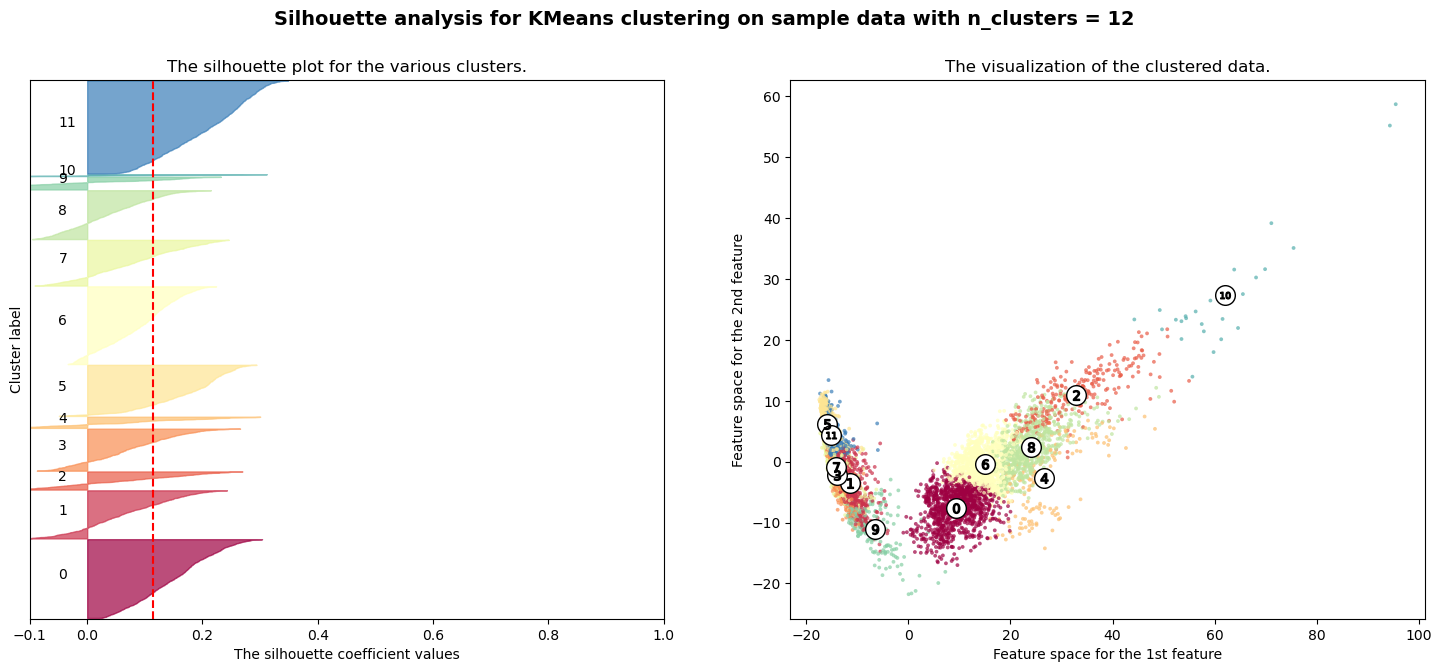

In [204]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import numpy as np

for n_clusters in ks:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_50_comp) + (n_clusters + 1) * 10])

    model = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = model.fit_predict(X_50_comp)

    silhouette_avg = silhouette_score(X_50_comp, cluster_labels)

    sample_silhouette_values = silhouette_samples(X_50_comp, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_2_comp[:, 0], X_2_comp[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = model.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

##### Step 4: Hierarchical Clustering

In [205]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster_model = AgglomerativeClustering(n_clusters=6, linkage='ward')
cluster_labels = agg_cluster_model.fit_predict(X_50_comp)

In [206]:
cluster_labels

array([5, 5, 5, ..., 2, 2, 2], shape=(7352,))

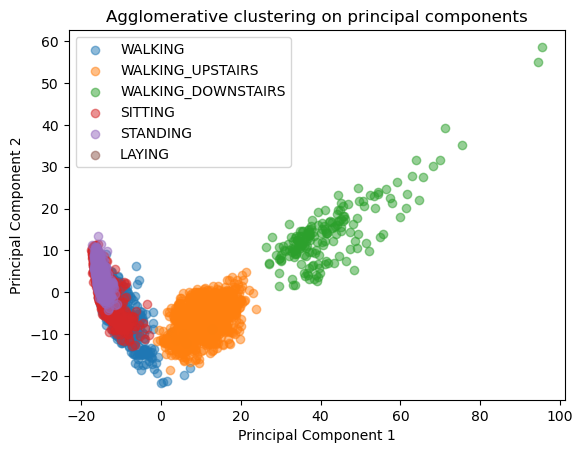

In [209]:
for val, name in label_map.items():
    mask = cluster_labels == val
    plt.scatter(X_2_comp[mask, 0], X_2_comp[mask, 1], label=name, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Agglomerative clustering on principal components")
plt.legend()

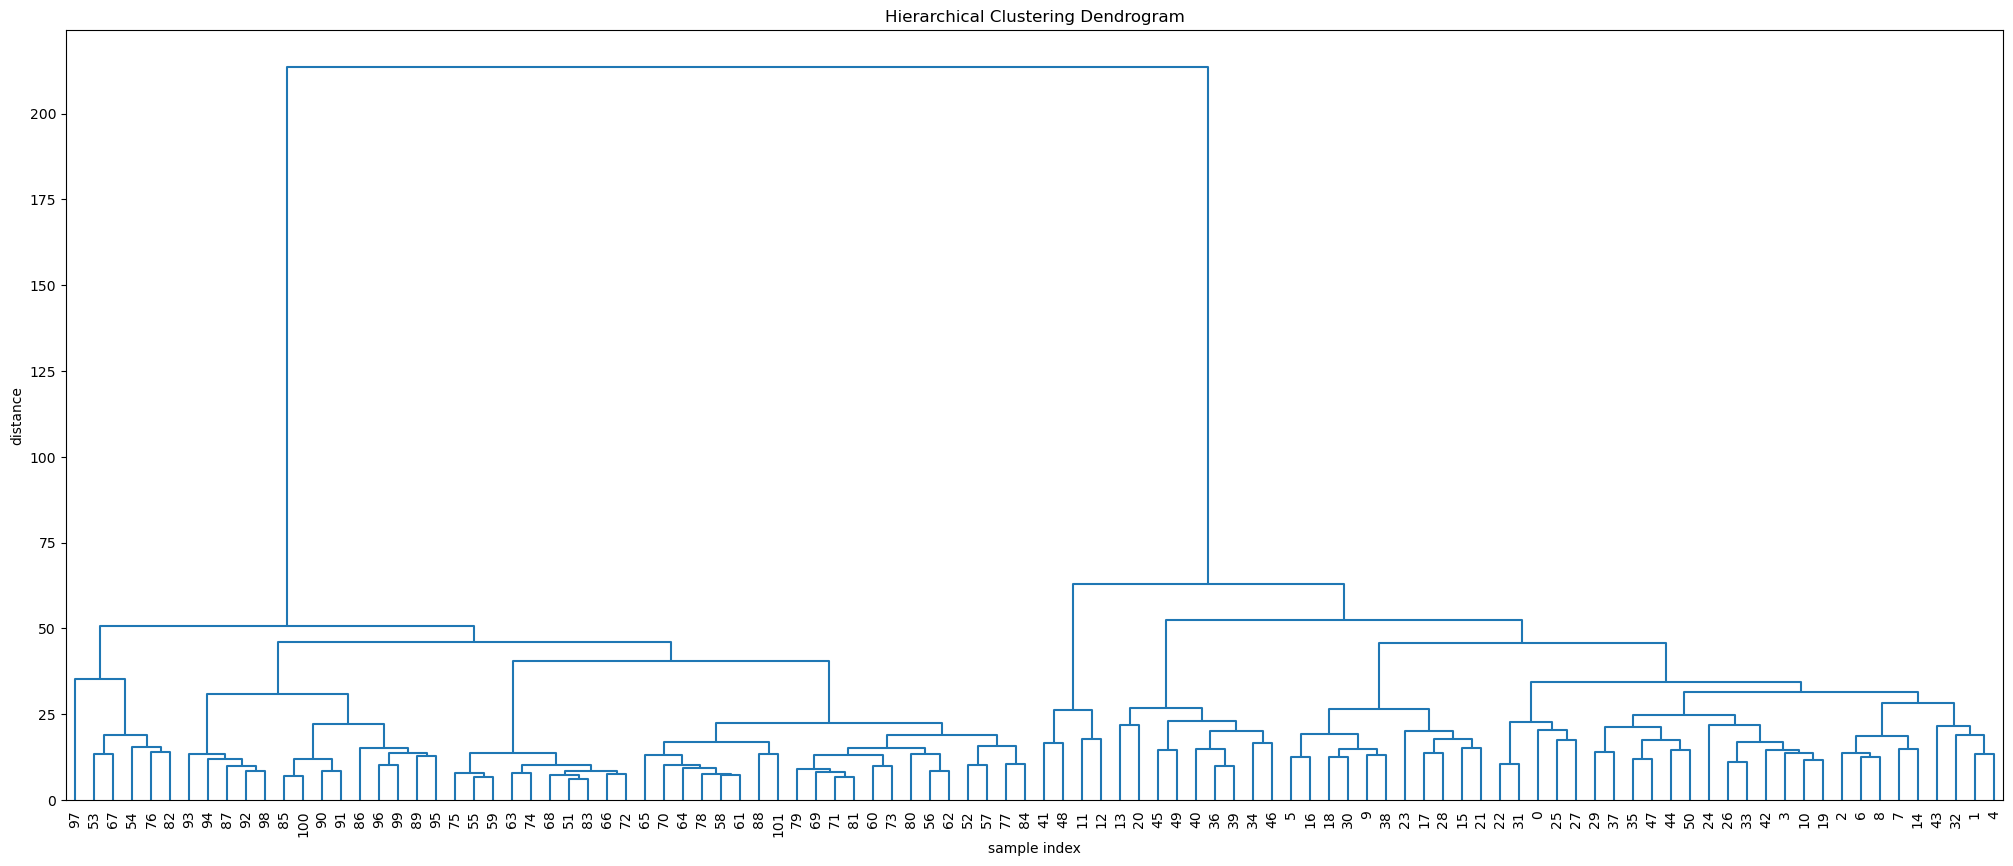

In [213]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Sample 100 points (17 points per class) for dendrogram

sample_dfs = []
for class_ in label_map.keys():
    sample_dfs.append(pd.DataFrame(X_50_comp[(y_train == class_)]).sample(17))

plot_df = pd.concat(sample_dfs)

Z = linkage(plot_df, method='ward')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z,
    leaf_rotation=90.,
    leaf_font_size=10.,
    color_threshold= 5
)
plt.show()

In [216]:
from sklearn.metrics import adjusted_rand_score

print(f"Silhouette Score: {silhouette_score(X_50_comp, cluster_labels)}")
print(f"Adjusted rand score: {adjusted_rand_score(y_train, cluster_labels)}")

Silhouette Score: 0.112529236095824
Adjusted rand score: 0.4781348164509335


##### Step 6: Evaluation and Reflection

1. The Agglomerative clustering algorithm gave the most coherent clusters. These cluster most resembled the true labels in the original 2 component PCA plot.
2. Yes, dimensionality reduction did help in being able to visualize and evaluate the accuracy of the clustering methods.
3. The kmeans clustering approach did poorly and did not match the true labels well. Instead, it appears the true clusters were segmented and data points belonging to one label were assigned to different clusters. Whereas Agglomerative clustering was much closer to the true labels as it was albe to better capture the spread of the clusters.
4. Without having access to labels one could inspect the attributes of data within each cluster to attempt to better categorize what traits are shared within a given cluster. After finding common traits you could then adjust your clustering parameters to optimize the clusters such that each cluster maximizes the amount of shared traits within between each data point in the cluster.